In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [229]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [230]:
train_data=pd.read_csv("train.csv", encoding="latin1")
y = train_data.pop("SalePrice") #La variable respuesta
X = train_data.pop("OverallQual") 

xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [231]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
qual = xTrain.values.reshape(-1,1)
qual_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(qual, price)
price_pred = lm.predict(qual_t)

### Ecuación

In [232]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*qual % + 0.4f '%(m,c)
print(label)

price_pred = 45805.7921*qual -97756.6342 


Text(0.5, 1.0, 'Test set quality vs sale price')

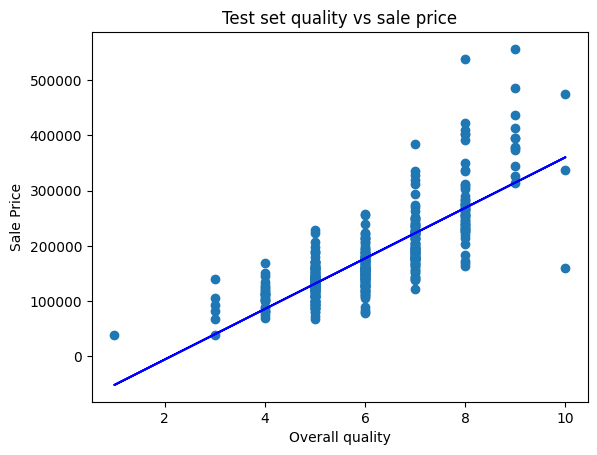

In [233]:
fig = plt.figure()
plt.scatter(qual_t, price_t) # Valor teórico (test)
plt.plot(qual_t, price_pred, color="blue") # valor predicho
plt.xlabel("Overall quality")
plt.ylabel("Sale Price")
plt.title("Test set quality vs sale price")

In [234]:
print("R^2: %.2f"%r2_score(price_t,price_pred))
print("MSE: %.2f"%mean_squared_error(price_t,price_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(price_t, price_pred)))

R^2: 0.61
MSE: 2278452141.00
RMSE: 47733.13


### Residuales

In [235]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[160000] [131272.3263939]  -->  		DIFF: [28727.6736061]
[160000] [131272.3263939]  -->  		DIFF: [28727.6736061]
[93000] [131272.3263939]  -->  		DIFF: [-38272.3263939]
[175500] [222883.91062176]  -->  		DIFF: [-47383.91062176]
[140000] [131272.3263939]  -->  		DIFF: [8727.6736061]
[124000] [177078.11850783]  -->  		DIFF: [-53078.11850783]
[207500] [131272.3263939]  -->  		DIFF: [76227.6736061]
[92000] [131272.3263939]  -->  		DIFF: [-39272.3263939]
[383970] [222883.91062176]  -->  		DIFF: [161086.08937824]
[205000] [222883.91062176]  -->  		DIFF: [-17883.91062176]
[157500] [177078.11850783]  -->  		DIFF: [-19578.11850783]
[131500] [131272.3263939]  -->  		DIFF: [227.6736061]
[136000] [177078.11850783]  -->  		DIFF: [-41078.11850783]
[181000] [177078.11850783]  -->  		DIFF: [3921.88149217]
[168500] [222883.91062176]  -->  		DIFF: [-54383.91062176]
[180500] [222883.91062176]  -->  		DIFF: [-42383.91062176]
[192500] [222883.91062176]  -->  		DIFF: [-30383.91062176]
[221000] [222883.910621

In [236]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 209
Valor real: [538000]
Valor predicho: [268689.70273569]
Diferencia máxima: [269310.29726431]


Text(0, 0.5, 'Residuales')

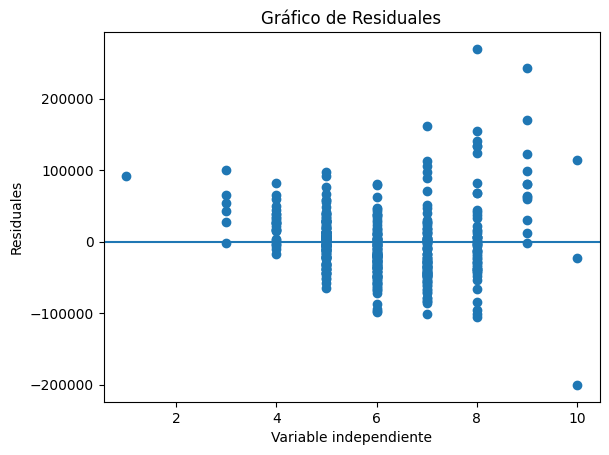

In [237]:
plt.plot(qual_t,residuales, 'o')
plt.axhline(0)
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

## Modelo multivariable

Separación de variables numéricas

In [238]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Quitar algunas columnas con impacto reducido
columnas_cuantitativas.remove("Id")
columnas_cuantitativas.remove("MSSubClass")
columnas_cuantitativas.remove("FullBath")
columnas_cuantitativas.remove("HalfBath")
columnas_cuantitativas.remove("BedroomAbvGr")
columnas_cuantitativas.remove("KitchenAbvGr")
columnas_cuantitativas.remove("TotRmsAbvGrd")
columnas_cuantitativas.remove("Fireplaces")
columnas_cuantitativas.remove("LotFrontage")
columnas_cuantitativas.remove("MasVnrArea")
columnas_cuantitativas.remove("GarageYrBlt")

_train = train_data[columnas_cuantitativas]

# Eliminar columnas que contienen NaN
_train = _train.dropna(axis=1)

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

y = _train.pop("SalePrice")
X = _train

Columnas usadas (27) :
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [239]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scalerA = StandardScaler()  # Crear el escalador

X_train_scaled = scalerA.fit_transform(X_train)
X_test_scaled = scalerA.transform(X_test)

(1021, 26)
(438, 26)
(1021,)
(438,)


In [240]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo1 = LinearRegression()
modelo1.fit(X_train_scaled, price)
y_pred_modelo1 = modelo1.predict(X_test_scaled)


### Ecuación

In [241]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 179861.9363 + (4884.5099 * LotArea) + (25505.2460 * OverallQual) + (6170.0840 * OverallCond) + (10533.0471 * YearBuilt) + (2598.6381 * YearRemodAdd) + (4538.2942 * BsmtFinSF1) + (-205.0365 * BsmtFinSF2) + (339.6533 * BsmtUnfSF) + (4827.8048 * TotalBsmtSF) + (11018.4135 * 1stFlrSF) + (8352.3891 * 2ndFlrSF) + (-419.2932 * LowQualFinSF) + (14843.2887 * GrLivArea) + (3194.6997 * BsmtFullBath) + (-461.3153 * BsmtHalfBath) + (11155.7925 * GarageCars) + (-733.8023 * GarageArea) + (4269.8156 * WoodDeckSF) + (-258.5576 * OpenPorchSF) + (997.2912 * EnclosedPorch) + (740.3046 * 3SsnPorch) + (4442.8518 * ScreenPorch) + (-1895.3948 * PoolArea) + (-319.1124 * MiscVal) + (-1080.7645 * MoSold) + (-988.5864 * YrSold)


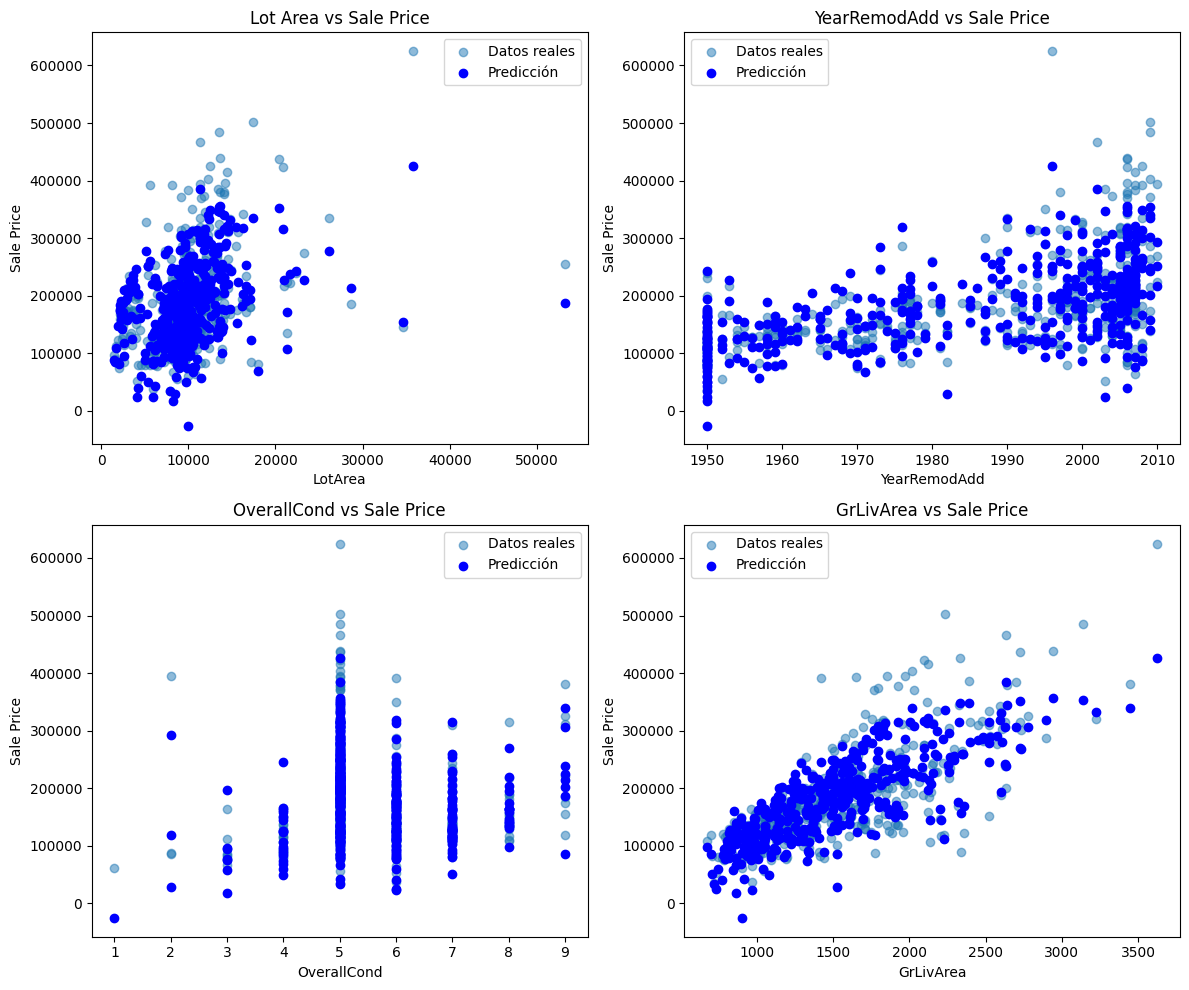

In [242]:
# Variables a graficar
variables = ["LotArea", "YearRemodAdd", "OverallCond", "GrLivArea"]
titles = ["Lot Area vs Sale Price", "YearRemodAdd vs Sale Price", 
          "OverallCond vs Sale Price", "GrLivArea vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo1, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [243]:
# Regression metrics
mse_modelo1=mean_squared_error(price_t, y_pred_modelo1) 
r2_modelo1=r2_score(y_test, y_pred_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))

R^2:  0.8404
MSE:  1102850812.3275
RMSE:  33209.1977


### Análisis de residuos

In [244]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[226000] [226884.86051987]  -->  		DIFF: [-884.86051987]
[143900] [145816.46272486]  -->  		DIFF: [-1916.46272486]
[143500] [144909.56784152]  -->  		DIFF: [-1409.56784152]
[167900] [204099.70568426]  -->  		DIFF: [-36199.70568426]
[248900] [257082.01801582]  -->  		DIFF: [-8182.01801582]
[138000] [149375.21542064]  -->  		DIFF: [-11375.21542064]
[243000] [227121.8695717]  -->  		DIFF: [15878.1304283]
[124500] [102954.72638827]  -->  		DIFF: [21545.27361173]
[122000] [162496.7914891]  -->  		DIFF: [-40496.7914891]
[216837] [234997.65798648]  -->  		DIFF: [-18160.65798648]
[175000] [151832.71244062]  -->  		DIFF: [23167.28755938]
[333168] [331337.0892557]  -->  		DIFF: [1830.9107443]
[160000] [179692.91591687]  -->  		DIFF: [-19692.91591687]
[305000] [296499.69826258]  -->  		DIFF: [8500.30173742]
[142500] [169405.63646224]  -->  		DIFF: [-26905.63646224]
[133700] [115386.38473089]  -->  		DIFF: [18313.61526911]
[174000] [209890.06892745]  -->  		DIFF: [-35890.06892745]
[168500] [173996

In [245]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 195
Valor real: [625000]
Valor predicho: [426180.79480098]
Diferencia máxima: [198819.20519902]


Text(0, 0.5, 'Residuales')

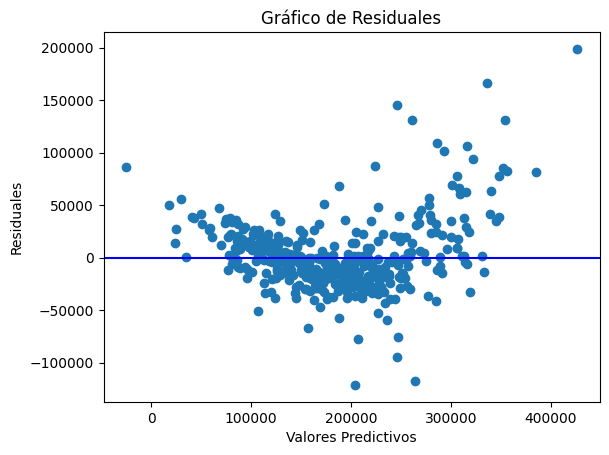

In [246]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

## Nuevo modelo

Separación de variables a usar

In [ ]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath", "SalePrice"]

_train2 = train_data[columnas_aUsar]

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

y = _train2.pop("SalePrice")
X = _train2

Columnas usadas (10) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath',
       'SalePrice'],
      dtype='object')


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scalerB = StandardScaler()  # Crear el escalador

X_train_scaled = scalerB.fit_transform(X_train)
X_test_scaled = scalerB.transform(X_test)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [249]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo2 = LinearRegression()
modelo2.fit(X_train_scaled, price)
y_pred_modelo2 = modelo2.predict(X_test_scaled)


### Ecuación

In [250]:
# Obtener coeficientes e intercepto
intercept = modelo2.intercept_[0]  # Intercepto
coefs = modelo2.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 179720.0656 + (27329.6499 * OverallQual) + (6486.0627 * OverallCond) + (11090.2987 * YearBuilt) + (6803.0109 * BsmtFullBath) + (8612.5443 * TotalBsmtSF) + (26161.5171 * GrLivArea) + (11137.4944 * GarageCars) + (4046.6524 * WoodDeckSF) + (679.4898 * FullBath)


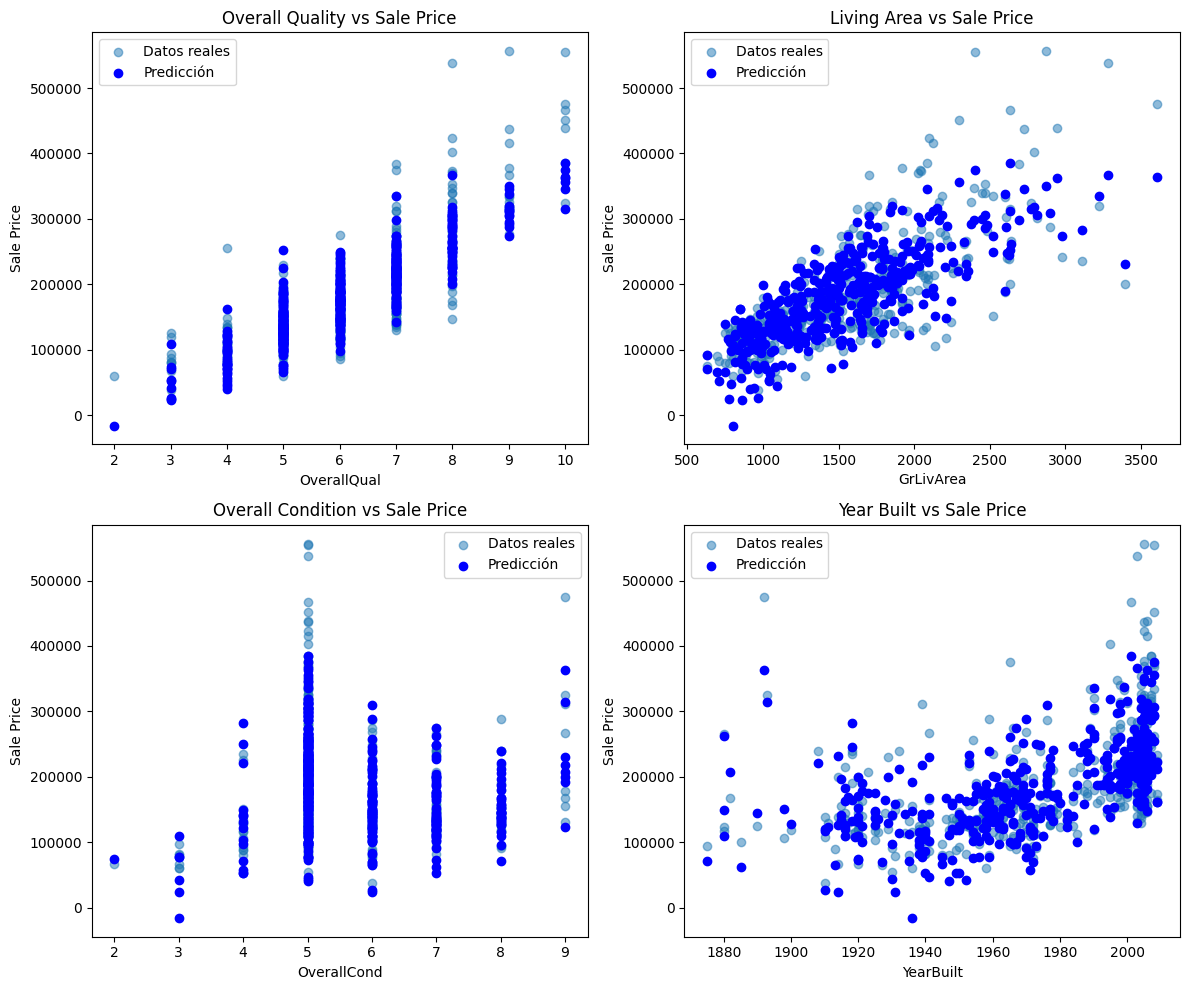

In [251]:
# Variables a graficar
variables = ["OverallQual", "GrLivArea", "OverallCond", "YearBuilt"]
titles = ["Overall Quality vs Sale Price", "Living Area vs Sale Price", 
          "Overall Condition vs Sale Price", "Year Built vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo2, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [252]:
# Regression metrics
mse_modelo2=mean_squared_error(price_t, y_pred_modelo2) 
r2_modelo2=r2_score(y_test, y_pred_modelo2)

print('R^2: ', round(r2_modelo2,4))
print('MSE: ', round(mse_modelo2,4))
print('RMSE: ', round(np.sqrt(mse_modelo2),4))

R^2:  0.8174
MSE:  1174827939.0087
RMSE:  34275.7631


### Análisis de residuos

In [253]:
resid_modelo2=price_t-y_pred_modelo2
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo2)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo2[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 4
Valor real: [556581]
Valor predicho: [351010.19996369]
Diferencia máxima: [205570.80003631]


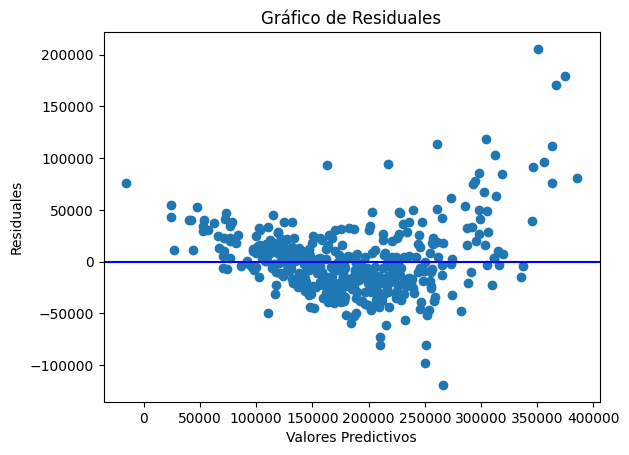

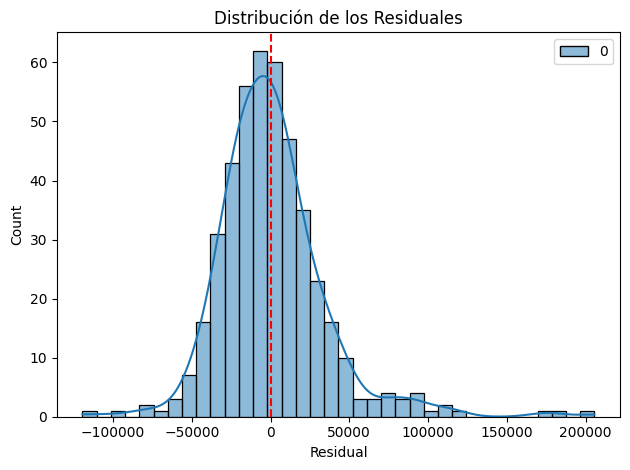

In [254]:
plt.scatter(y_pred_modelo2,resid_modelo2)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

# Distribución de los residuales
plt.figure()
sns.histplot(resid_modelo2, kde=True)
plt.title('Distribución de los Residuales')
plt.xlabel('Residual')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()

## Data Set de prueba

In [255]:
test_data=pd.read_csv("test.csv", encoding="latin1")
test_sample=pd.read_csv("sample_submission.csv", encoding="latin1")
price_theory = test_sample["SalePrice"]

Prueba con el modelo univariado

In [278]:
quality_t = test_data["OverallQual"]
quality_t = quality_t.values.reshape(-1,1)
price_pred2 = lm.predict(quality_t)

# Guardar los IDs
test_ids = test_data["Id"]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados

     Id      SalePrice
0  1461  131272.326394
1  1462  177078.118508
2  1463  131272.326394
3  1464  177078.118508
4  1465  268689.702736
5  1466  177078.118508
6  1467  177078.118508
7  1468  177078.118508
8  1469  222883.910622
9  1470   85466.534280


Prueba con el modelo de variables numericas

In [279]:
quality_t = test_data[_train.columns]

# Eliminar filas con NaN basándonos en quality_t y asegurando que price_theory tenga los mismos índices
valid_indices = quality_t.dropna().index

quality_t = quality_t.loc[valid_indices]  # Mantener solo los índices válidos en X
price_theory = price_theory.loc[valid_indices]  # Mantener los mismos índices en y

X_test_scaled = scalerA.transform(quality_t)  

# Hacer predicciones con el modelo
price_pred2 = modelo1.predict(X_test_scaled)

# Guardar los IDs
test_ids = test_data["Id"].loc[valid_indices]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados



     Id      SalePrice
0  1461  115724.991490
1  1462  161780.942049
2  1463  177009.821958
3  1464  201168.195656
4  1465  218526.491066
5  1466  180841.701094
6  1467  204723.255419
7  1468  168484.640510
8  1469  208826.430269
9  1470  113017.209439


Prueba con el último modelo

In [280]:
quality_t = test_data[_train2.columns]

# Eliminar filas con NaN basándonos en quality_t y asegurando que price_theory tenga los mismos índices
valid_indices = quality_t.dropna().index

quality_t = quality_t.loc[valid_indices]  # Mantener solo los índices válidos en X

X_test_scaled = scalerB.transform(quality_t)  

# Hacer predicciones con el modelo
price_pred2 = modelo2.predict(X_test_scaled)

# Guardar los IDs
test_ids = test_data["Id"].loc[valid_indices]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados


     Id      SalePrice
0  1461  107075.240939
1  1462  164196.751361
2  1463  170423.493096
3  1464  200132.173197
4  1465  210657.619883
5  1466  185070.352743
6  1467  205051.990677
7  1468  172876.798972
8  1469  211746.566451
9  1470  115468.124358
